In [35]:
import os
import pandas as pd

In [36]:
import sys
sys.path.append('../src/')

%load_ext autoreload
%autoreload 2
# Importing our custom module(s)
import folds
import utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [108]:
repo_path = '/cluster/tufts/hugheslab/eharve06/bdl-transfer-learning'
experiments_path = os.path.join(repo_path, 'experiments')

In [109]:
experiment_files = [os.path.join(subdir, file) \
                    for subdir, dirs, files in os.walk(experiments_path) \
                    for file in files]

In [110]:
def load_experiment(path):
    df = pd.read_csv(path, index_col='Unnamed: 0')
    if 'lrs' in df.columns:
        df.lrs = df.lrs.apply(lambda string: np.fromstring(string[1:-1], sep=', '))
    return df

In [124]:
df = load_experiment(experiment_files[-2])
df.head()

,epoch,train_loss,train_auroc,val_loss,val_auroc,test_loss,test_auroc,lrs
0,1,42637.359220,0.681400,358833.21875,0.709730,358834.03125,0.592500,"[0.1, 0.09999999496448764, 0.09999997985795155..."
1,2,42926.859375,0.523259,359107.03125,0.506453,359128.62500,0.498720,"[0.09999981872166135, 0.09999975326009292, 0.0..."
2,3,42656.760442,0.646375,358852.87500,0.677398,358855.00000,0.601754,"[0.0999992748879599, 0.09999914900081004, 0.09..."
3,4,42634.373105,0.774945,358830.43750,0.817376,358830.50000,0.736689,"[0.09999836850283902, 0.09999818219102058, 0.0..."
4,5,42635.020614,0.722705,358831.06250,0.745066,358830.93750,0.717834,"[0.09999709957287108, 0.09999685283773502, 0.0..."


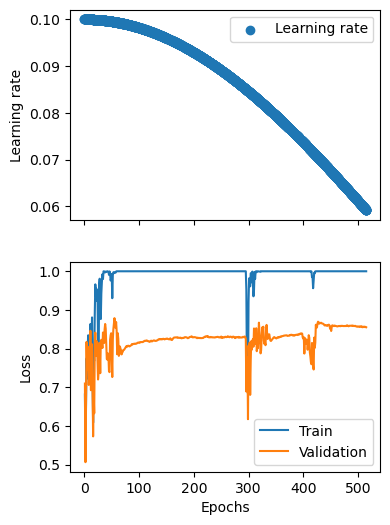

In [125]:
import matplotlib.pyplot as plt
lrs = np.array(df.lrs.to_list()).ravel()
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(4, 6), sharex=True)
np.array(axs).flatten()[0]\
.scatter(np.linspace(0, np.max(df.epoch.to_list()), len(lrs)), lrs, label='Learning rate')
np.array(axs).flatten()[0]\
.set_ylabel('Learning rate')
np.array(axs).flatten()[0]\
.legend()
np.array(axs).flatten()[1]\
.plot(df.epoch.to_list(), df.train_auroc.to_list(), label='Train')
np.array(axs).flatten()[1]\
.plot(df.epoch.to_list(), df.val_auroc.to_list(), label='Validation')
np.array(axs).flatten()[1]\
.set_ylabel('Loss')
np.array(axs).flatten()[1]\
.legend()
np.array(axs).flatten()[-1]\
.set_xlabel('Epochs')
plt.show()

In [123]:
import itertools
prior_scales = np.logspace(5, 9, num=5)
lr_0s = np.logspace(-1, -4, num=7)
weight_decays = np.append(np.logspace(-2, -6, num=7), 0)
counter = 0
for prior_scale, lr_0, weight_decay in itertools.product(prior_scales, lr_0s, weight_decays):
    counter+=1
print(counter)

56
